In [1]:

from SimuBox import Landscaper, VoronoiCell, Scatter
from SimuBox import TopoCreater, fA, x
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

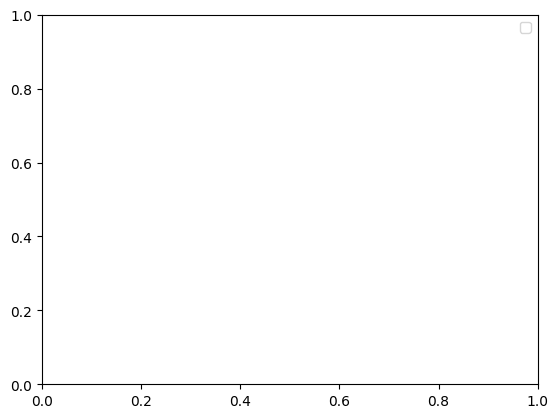

In [5]:
plt.legend(labels=["A", "B"], loc="best")

## 拓扑结构

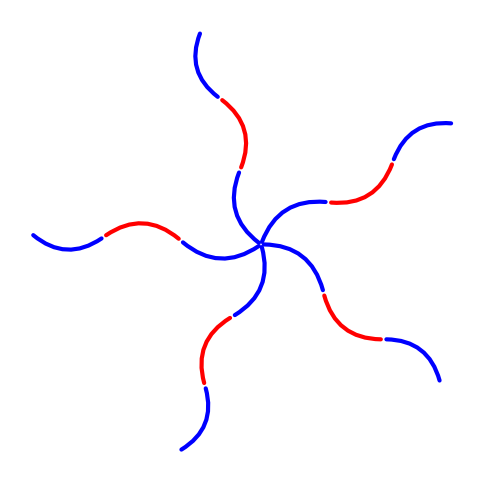

TopoShow(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'B': 'b', 'A': 'r'}, rad=0.4)

In [2]:
tc = TopoCreater(verbose=False)
tc.fromJson('./Datasets/Topo/input_star.json', verbose=False)
tc.show_topo(curve=True, show_nodes=False, show_edge_labels=False, node_color=None, show_node_labels=False)

In [3]:
tc.RPA()
res = tc.ODT(plot=False)
print(res.xN[0])

79.35398092239298


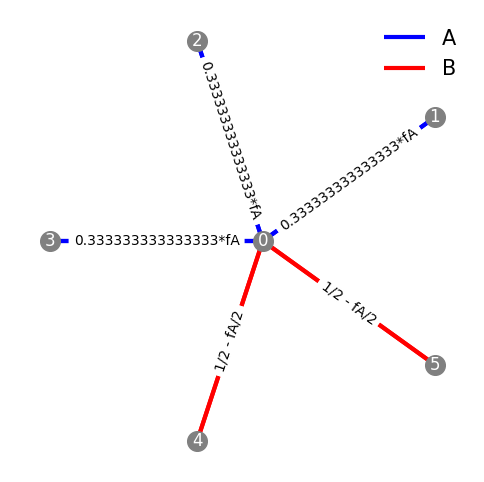

TopoShow(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'A': 'b', 'B': 'r'}, rad=0.4)

In [4]:
tc = TopoCreater(verbose=False)
tc.AmBn("AAABB",fractions=[1/3*fA]*3 + [(1-fA)/2]*2, verbose=False)
tc.show_topo(colorlist=['b','r'])

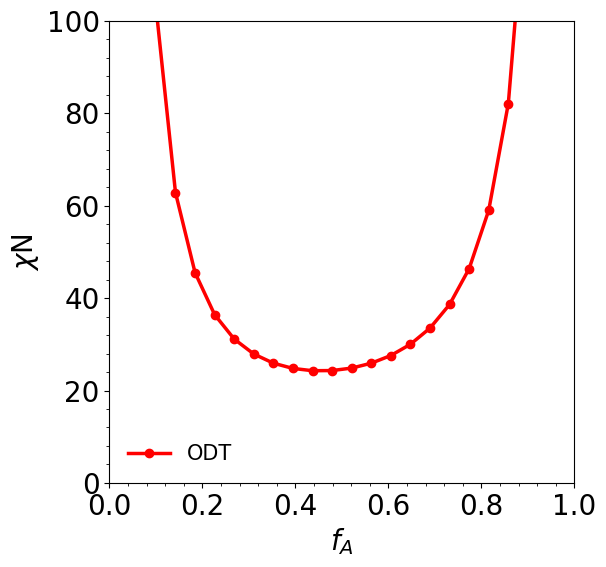

In [5]:
tc.RPA()
res = tc.ODT(fs=np.linspace(0.1, 0.9, 20), plot=True)

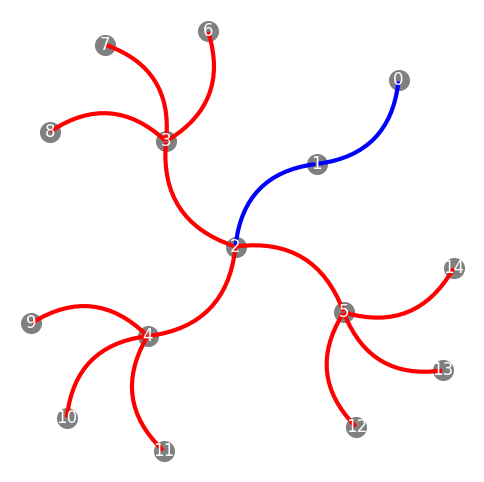

TopoShow(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'A': 'b', 'B': 'r'}, rad=0.4)

In [6]:
tc = TopoCreater()
tc.dendrimer(A_block_layer=2, B_block_layer=2, A_branch=1, B_branch=3)
tc.show_topo(colorlist=['b','r'], curve=True, show_edge_labels=False)

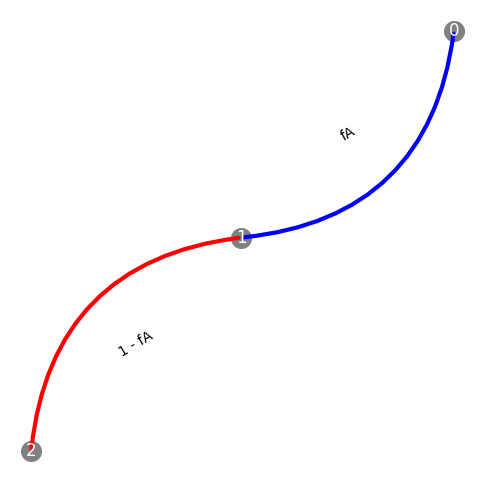

In [7]:
tc = TopoCreater(verbose=False)
tc.linear("AB", fractions=[fA, 1-fA])
tc.show_topo(colorlist=['b','r'], curve=True)
tc.RPA()
# res = tc.ODT(fs=np.linspace(0.1, 0.9, 20))


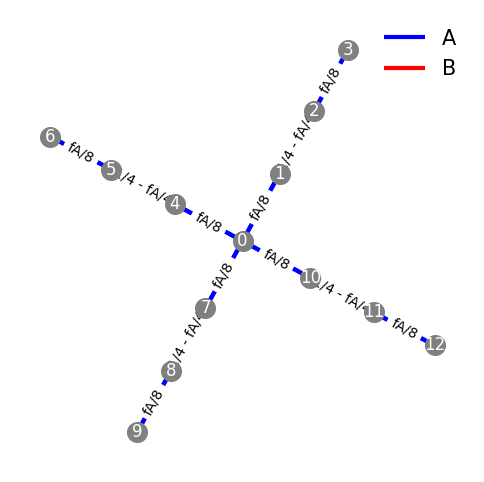

TopoShow(fig=<Figure size 600x600 with 1 Axes>, ax=<Axes: >, kind_color={'A': 'b', 'B': 'r'}, rad=0.4)

In [8]:
tc = TopoCreater()
tc.star("ABA", arm=4, verbose=False, fractions=[(fA/2)/4, (1-fA)/4, (fA/2)/4])
tc.show_topo(colorlist=['b','r'])

## 散射图

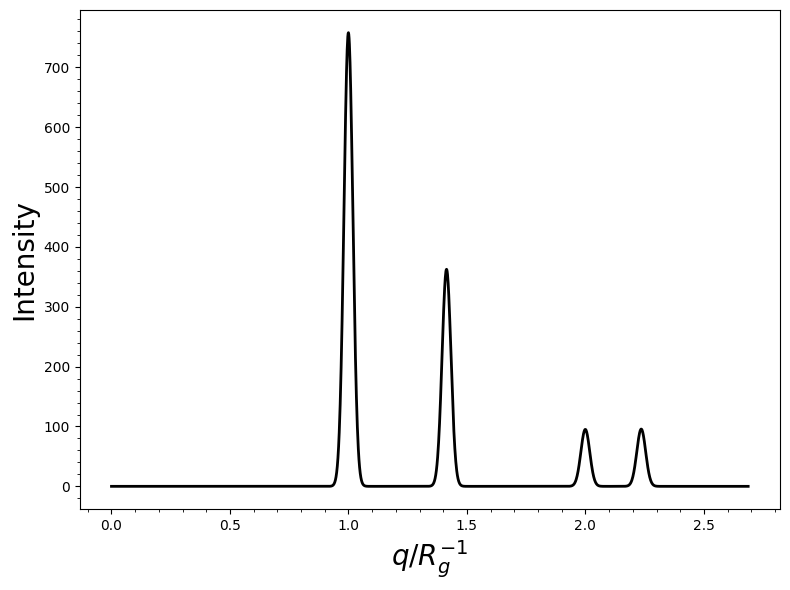

In [9]:
from SimuBox import read_density, read_printout, parse_density, iso2D
path = "./Datasets/Scatter/phout_C4.txt"
des = read_density(path)
sc = Scatter.sacttering_peak(density=des, target=0)
sc_plots = Scatter.show_peak(res=sc, cutoff=300)

## 二维结构图

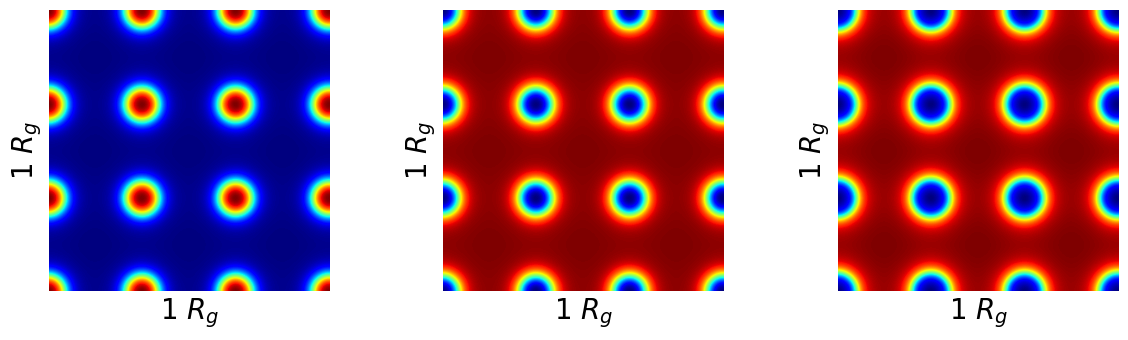

In [10]:
iso_plots = iso2D(des, target=[0,1,2])

## 自由能景观图

极小值点: ly: 2.051041, lz:2.051041, freeE: 11.68579359
Free energy mat shape: (121, 121)
level:  0.001 面积： 0.06137515892651197 周长： 1.3302406387698007 IQ:  0.4358550386775006
level:  0.01 面积： 0.4122518259705505 周长： 2.8725683649276608 IQ:  0.6278150251630036
Save to: Datasets\landscape.png


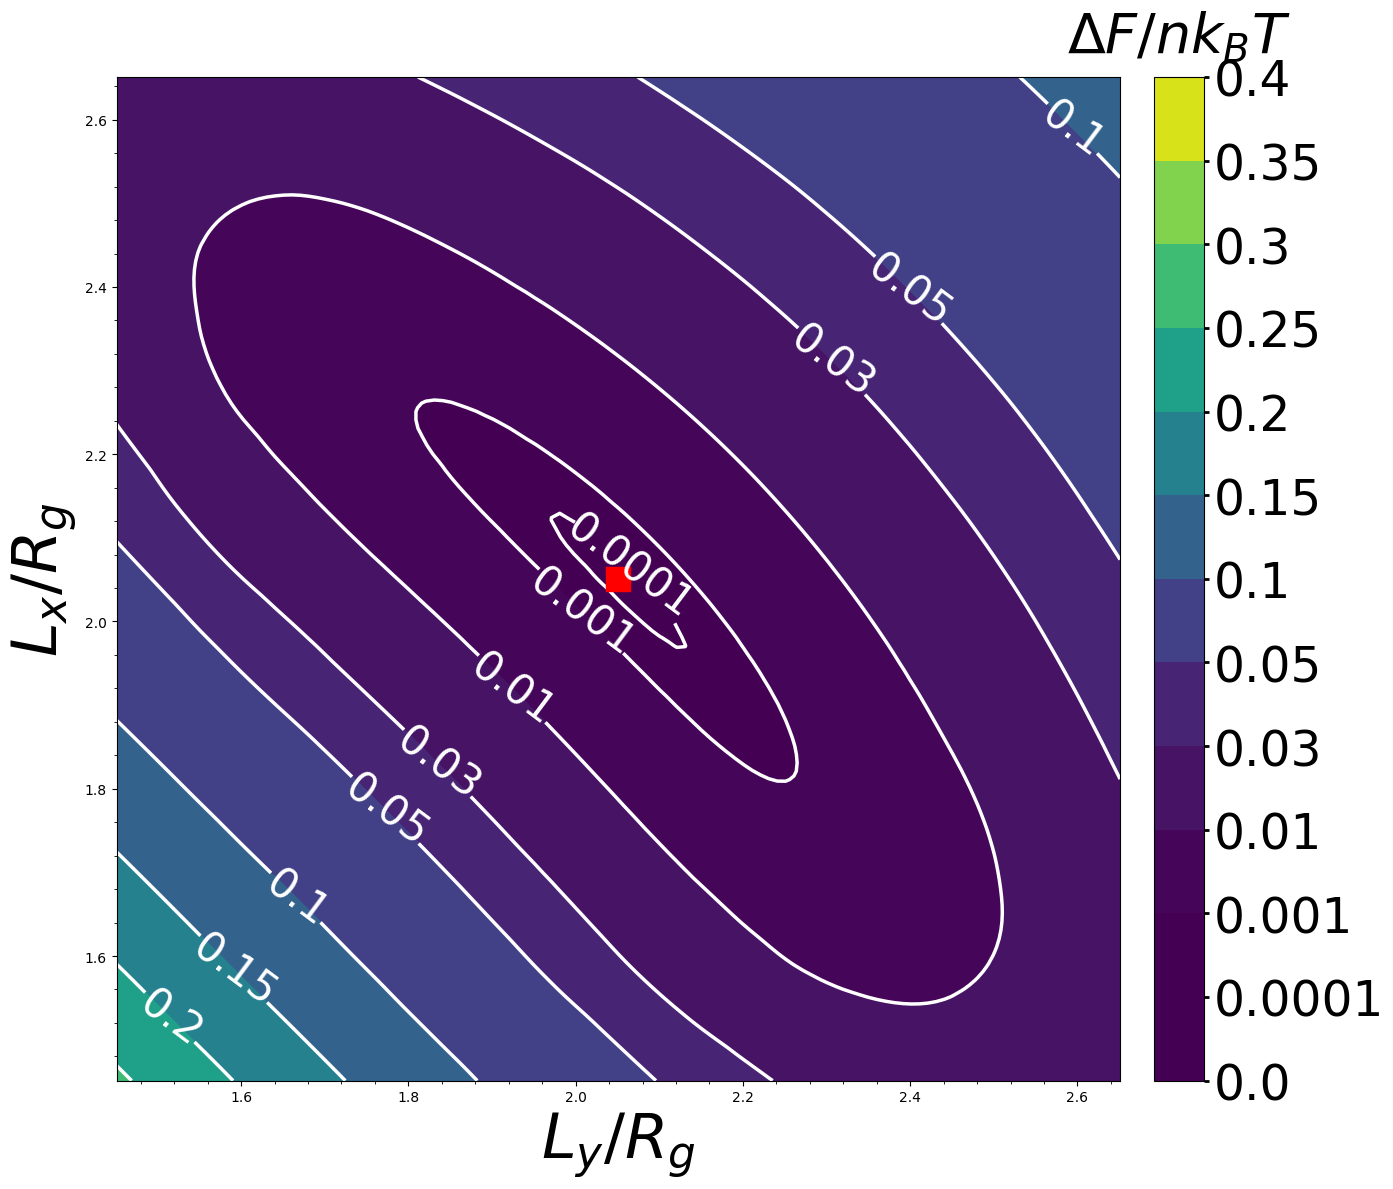

In [11]:
land = Landscaper(path='./Datasets/landscape.csv')
res = land.prospect(
    levels=[0, 0.0001, 0.001, 0.01, 0.03, 0.05,
            0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    precision=-4,
    asp='square',
    xminor=5,
    yminor=5,
    clbacc=4,
    figsize=(16, 12),
    point_list=[
        [2.05104063, 2.05104063, 's', 'r', 300]
    ],
    manual=[
        (1.5, 1.5),
        (1.6,1.6),
        (1.66,1.66),
        (1.77,1.77),
        (1.84,1.84),
        (1.93,1.93),
        (2, 2),
        (2.06,2.06),
        (2.3,2.3),
        (2.4,2.4),
        (2.6,2.6),
    ]
    )


## Voronoi Cell

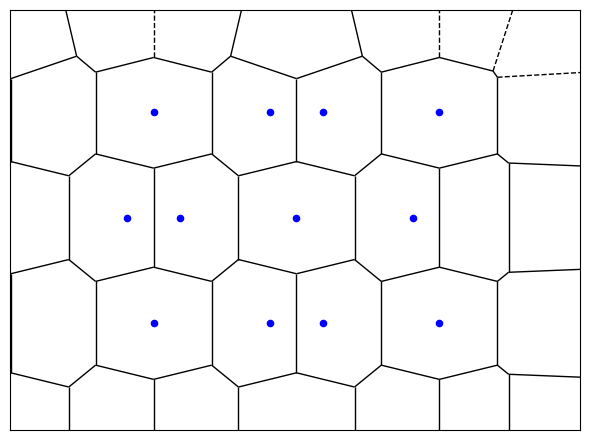

In [12]:
from SimuBox import AnalyzeMode, read_printout, read_density, VoronoiCell
import numpy as np
des = read_density("./Datasets/Voronoi")
pri = read_printout("./Datasets/Voronoi")
des.repair_from_printout(pri)
vc = VoronoiCell.Analyze(density=des, mode=AnalyzeMode.VORONOI, slices=(0, 0))

100%|██████████| 250000/250000 [00:02<00:00, 104831.34it/s]


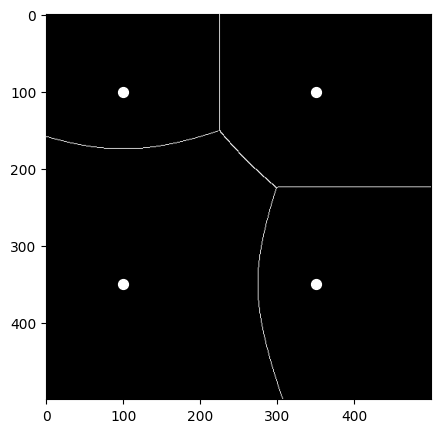

In [13]:
from SimuBox import WeightedMethod, VoronoiCell
fig, ax = VoronoiCell.weighted_voronoi_diagrams(
        [[100,350],[100,100],[350,350],[350,100]],
        weights=[1e2,0,0,0],
        plot='vertices',
        method=WeightedMethod.additive
)

## 分峰

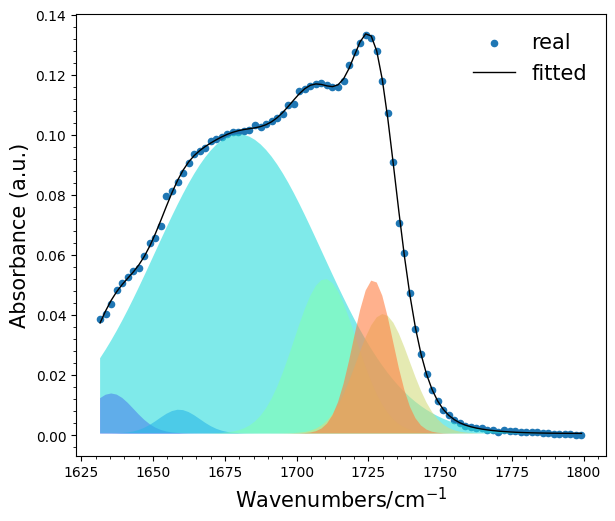

In [14]:
from SimuBox import peak_fit, PeakInfo
import pandas as pd
import numpy as np
from pathlib import Path

peak_folder = Path("./Datasets/Peaks")

peak_location = np.loadtxt(peak_folder / "峰位.txt")
peaks = [PeakInfo(center=i, fix=(False, True, False)) for i in peak_location[0]]
line_before = pd.read_excel(peak_folder / "分峰拟合.xlsx", sheet_name='lineB')
thresh_min = 1630
thresh_max = 1800
line_before = line_before[(line_before["Wavenumber (X)"] > thresh_min) & (line_before["Wavenumber (X)"] < thresh_max)]

x = line_before['Wavenumber (X)']
y = line_before['absorption (Y)']

res = peak_fit(x, y, peaks, scale=(0.99,1.01))

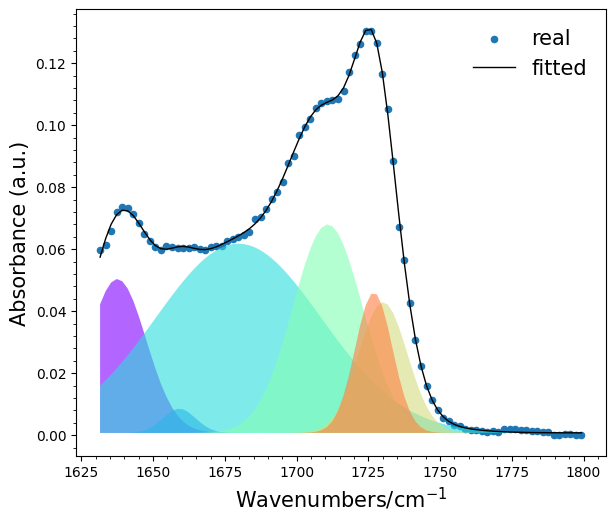

In [15]:
line_after = pd.read_excel(peak_folder / "分峰拟合.xlsx", sheet_name='lineA')
line_after = line_after[(line_after["Wavenumber (X)"] > thresh_min) & (line_after["Wavenumber (X)"] < thresh_max)]
x = line_after['Wavenumber (X)']
y = line_after['absorption (Y)']
res = peak_fit(x, y, peaks=peaks, scale=(0.99,1.01))